MNIST KAGGLE

https://www.kaggle.com/oddrationale/mnist-in-csv

Get kaggle data to colab

https://www.kaggle.com/general/74235

In [28]:
! pip install -q kaggle

from google.colab import files

files.upload()  #upload the kaggle json downloaded from your account generate token

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [29]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [30]:
 ! kaggle datasets list

 # see data on kaggle

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-21 06:23:33           5634  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3102  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            373  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1846  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [4]:
! kaggle datasets download -d oddrationale/mnist-in-csv

 59% 9.00M/15.2M [00:00<00:00, 18.2MB/s]
100% 15.2M/15.2M [00:00<00:00, 25.9MB/s]


In [5]:
!unzip /content/mnist-in-csv.zip

Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


### Data is here now in files

This dataset has images of numbers of 28x28 pixels

60000 images

The pixels have value (0,255) (black, white)



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dft = pd.read_csv("/content/mnist_train.csv")

In [8]:
dft.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
dft.shape, 28*28
# the 1 column is target (label)

((60000, 785), 784)

In [14]:
def image_plot (x):
  """ takes in the pixels of image as an array
      reshapes to 28x28 format and then 
      renders/draws it using pyplot"""
  x = x.reshape (28,28)
  plt.imshow(x, cmap="gray")

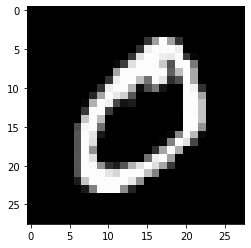

In [17]:
tmp_test = dft.values [0] [1:]    # converty to np array then slicing
image_plot(tmp_test)

In [18]:
x_train = dft.iloc[:, 1:].values
y_train = dft.iloc[:, 0].values
x_train.shape, y_train.shape

((60000, 784), (60000,))

(None, 6)

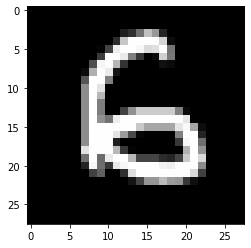

In [31]:
image_plot(x_train[109]), y_train[109]

No preprocessing required here as all clear

starting with knn model

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape 


((48000, 784), (12000, 784), (48000,), (12000,))

In [26]:
def distance (x1, x2):
  return np.sqrt( sum( (x1-x2)**2 ) )


def KNN (x, y, testing_point, K=7):
  
  dist_values = []
  for i in range(x.shape[0]):
    dist = distance(x[i], testing_point)
    dist_values.append([dist, y[i]])

  dist_values.sort()    
  k_vals = dist_values[:K]
  k_vals = np.array(k_vals)

  new_val = np.unique(k_vals[:,1], return_counts=True)
  
  index = new_val[1].argmax() 
  ans = new_val[0][index]

  return ans

Below cell takes a lot of time as 48k * 12k are being computed in that also 28 * 28 * 2

In [ ]:
"""
pred = []
for i in range (x_test.shape[0]):
  pred.append( KNN(x_train, y_train,x_test[i]) )
"""

so instead of doing this we using another library tqdm

In [32]:
from tqdm import tqdm
# gives current info if how many loops have run

In [ ]:
"""
pred = []
for i in tqdm(range(x_test.shape[0])):
  pred.append( KNN(x_train, y_train,x_test[i]) )
"""
# still taking a lot of time so just doing first 100 imgs

In [35]:
pred = []
for i in tqdm(range(20)):
  pred.append( KNN(x_train, y_train,x_test[i]) )
# 100 were taking 15+ mins this done in 2-3



  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:09<02:52,  9.07s/it]

 10%|█         | 2/20 [00:17<02:42,  9.00s/it]

 15%|█▌        | 3/20 [00:26<02:31,  8.93s/it]

 20%|██        | 4/20 [00:35<02:23,  8.98s/it]

 25%|██▌       | 5/20 [00:44<02:15,  9.02s/it]

 30%|███       | 6/20 [00:54<02:06,  9.06s/it]

 35%|███▌      | 7/20 [01:03<01:58,  9.09s/it]

 40%|████      | 8/20 [01:12<01:48,  9.05s/it]

 45%|████▌     | 9/20 [01:21<01:39,  9.05s/it]

 50%|█████     | 10/20 [01:30<01:29,  8.99s/it]

 55%|█████▌    | 11/20 [01:39<01:20,  8.98s/it]

 60%|██████    | 12/20 [01:47<01:11,  8.95s/it]

 65%|██████▌   | 13/20 [01:56<01:02,  8.98s/it]

 70%|███████   | 14/20 [02:05<00:53,  8.96s/it]

 75%|███████▌  | 15/20 [02:14<00:44,  8.98s/it]

 80%|████████  | 16/20 [02:23<00:35,  8.98s/it]

 85%|████████▌ | 17/20 [02:33<00:27,  9.03s/it]

 90%|█████████ | 18/20 [02:42<00:18,  9.05s/it]

 95%|█████████▌| 19/20 [02:51<00:09,  9.11s/it]

100%|██████████| 20/20 [03:00<00:00,

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7, n_jobs=-1) # complete utilization
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='uniform')

In [40]:
pred2 = clf.predict(x_test[:20])

In [50]:
(pred == pred2).sum()

20

In [47]:
(y_test[:20] == pred2).sum()

20

### Evaluation Matrices

In [51]:
pred = clf.predict(x_test)
# took around 20 mins

Confusion Matrix

to calculate accuracy of out model

nxn for n classes, so like for 2 classes 2x2 in it, it will have 0T, 0F, 1T, 1F

OR actual values vs predicted values 

1F means 1 was predicted and it was wrong answer

    
  ________ 0 _______ 1 _____ (predicted)

0 |

1 |

(actual)

The diagonal is all the correct answers

In [54]:
from sklearn.metrics import confusion_matrix

print(len(pred))

confusion_matrix(y_test, pred)#, labels=["0","1","2","3","4","5","6,",'7','8','9'])


12000


array([[1178,    2,    0,    0,    0,    1,    3,    0,    0,    0],
       [   0, 1373,    3,    1,    0,    0,    1,    1,    1,    1],
       [   8,   14, 1092,    4,    3,    1,    4,   10,    4,    2],
       [   2,    3,    4, 1193,    0,   14,    0,    8,    3,    7],
       [   3,   10,    0,    0, 1105,    0,    0,    4,    1,   26],
       [   6,    4,    3,   11,    1, 1038,    8,    1,    0,    4],
       [   7,    4,    0,    0,    0,    1, 1196,    0,    0,    0],
       [   2,   17,    4,    0,    4,    0,    0, 1240,    0,   14],
       [   5,   19,    7,   14,    8,   22,    5,    3, 1059,   30],
       [   4,    4,    3,   12,    9,    5,    2,   12,    2, 1120]])

dammmmnnnnn these results

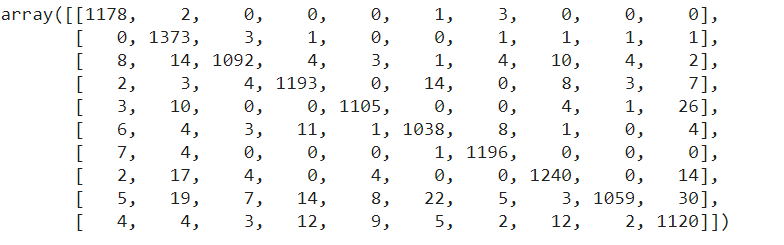

In [58]:
clf.score(x_test[:100], y_test[:100])

1.0

In [61]:
( y_test == pred ).sum() / len(pred)

0.9661666666666666